# Co-ordinate transformation

Σκοπός είναι, έχοντας μία τυχαία μορφή σημείων (π.χ ευθεία), και ένα σημείο, να τα μεταφέρουμε στην αρχή των αξόνων διατηρώντας τα χαρακτηριστικά τους. Η ευθεία θα είναι η τροχιά του ρομπότ, ενώ το σημείο θα είναι το RFID tag.

***

Έστω ότι έχουμε την ευθεία $ y = 2x + 5 $ για $x$ από $0$ μέχρι $10$, και το σημείο $(4,20)$, όπως φαίνεται παρακάτω.

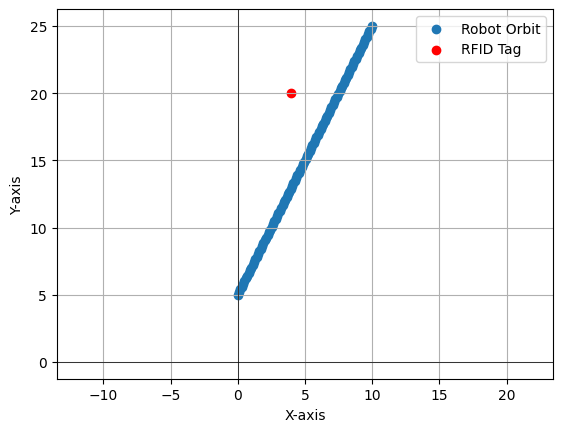

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Hypothetical Robot Orbit
x = np.linspace(0, 10, 100)
y = 2*x + 5

# Robot Orbit
plt.scatter(x, y , label = 'Robot Orbit')

# RFID Tag
rfid_pos = [4, 20]
plt.scatter(rfid_pos[0],rfid_pos[1], label = 'RFID Tag', color = 'red')

# Labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black', linewidth=0.5)  
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.axis('equal')
plt.grid(True)

# Show plot
plt.show()

Για να μετατρέψουμε μία τυχαία ευθεία στον Χ άξονα, αρχικά αφαιρούμε από όλα τα σημεία το αρχικό $(x0, y0)$, στην συνέχεια εντοπίζουμε την κλίση της ευθείας (ή οποιαδήποτε άλλής μορφής καμπύλη) από το αρχικό $(x0, y0)$ και το τελικό $(xn, yn)$ και στρέφουμε όλα τα σημεία σύμφωνα με τον παρακάτω πίνακα στροφής.

$$
R = \begin{bmatrix} 
\cos\theta & \sin\theta \\ 
-\sin\theta & \cos\theta 
\end{bmatrix}
$$



Πρέπει να **προσέξουμε** ότι σε περίπτωση που το $x[-1]$ έχει αρνητικό πρόσημο, η στροφή θα φέρει την ευθεία στον αρνητικό ημιάξονα $x$ οπότε απαιτείται μία τεχνητή εισαγωγή $-180°$.

**Επιπλέον** σε περίπτωση που η τελική θέση του RFID Tag είναι στον αρνητικό ημιάξονα $y$ αλλάζουμε τα πρόσημα όλων των $y$, με σκοπό να τοποθετηθέι το Tag σε θετικές τιμές.

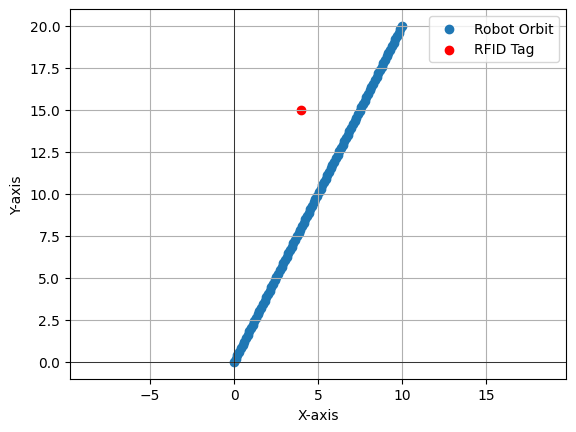

In [80]:
#Subtract the starting point from all the points
y_new = y - y[0]
x_new = x - x[0]

rfid_new = [rfid_pos[0] - x[0], rfid_pos[1] - y[0]]

# Plot the new orbit and RFID Tag
plt.scatter(x_new, y_new , label = 'Robot Orbit')

# RFID Tag
plt.scatter(rfid_new[0],rfid_new[1], label = 'RFID Tag', color = 'red')

# Labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black', linewidth=0.5)  
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.axis('equal')
plt.grid(True)

# Show plot
plt.show()

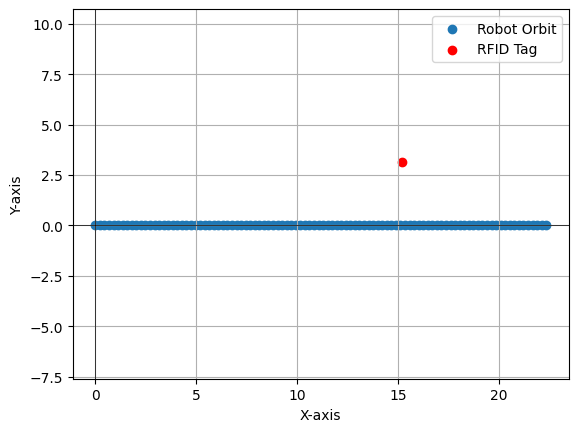

In [81]:
# Calculate the angle
angle = np.arctan(y_new[-1] / x_new[-1])

# Check if x_new[-1] is negative, then subtract 180
if x_new[-1] < 0:
    angle -= np.pi

# Rotate all the points
x_rot = x_new * np.cos(angle) + y_new * np.sin(angle)
y_rot = -x_new * np.sin(angle) + y_new * np.cos(angle)

# Rotate the RFID Tag
rfid_rot = [rfid_new[0] * np.cos(angle) + rfid_new[1] * np.sin(angle), -rfid_new[0] * np.sin(angle) + rfid_new[1] * np.cos(angle)]

# Check if the RFID Tag is in the negative y-axis, then move everything to the positive y-axis
if rfid_rot[1] < 0:
    y_rot = -y_rot
    rfid_rot[1] = -rfid_rot[1]

# Plot the new orbit and RFID Tag
plt.scatter(x_rot, y_rot , label = 'Robot Orbit')

# RFID Tag
plt.scatter(rfid_rot[0],rfid_rot[1], label = 'RFID Tag', color = 'red')

# Labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black', linewidth=0.5)  
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.axis('equal')
plt.grid(True)

# Show plot
plt.show()


Μετατρέπουμε την παραπάνω διαδικασία σε μία συνάρτηση.

In [82]:
def rotate_points(x, y, rfid_pos):
    # Subtract the starting point from all the points
    y_new = y - y[0]
    x_new = x - x[0]

    rfid_new = [rfid_pos[0] - x[0], rfid_pos[1] - y[0]]

    # Calculate the angle
    angle = np.arctan(y_new[-1] / x_new[-1])

    # Check if x_new[-1] is negative, then subtract 180
    if x_new[-1] < 0:
        angle -= np.pi

    # Rotate all the points
    x_rot = x_new * np.cos(angle) + y_new * np.sin(angle)
    y_rot = -x_new * np.sin(angle) + y_new * np.cos(angle)

    # Replace very small values with 0
    x_rot = np.where(np.abs(x_rot) < 1e-10, 0, x_rot)
    y_rot = np.where(np.abs(y_rot) < 1e-10, 0, y_rot)
            
    # Rotate the RFID Tag
    rfid_rot = [rfid_new[0] * np.cos(angle) + rfid_new[1] * np.sin(angle), -rfid_new[0] * np.sin(angle) + rfid_new[1] * np.cos(angle)]

    # Check if the RFID Tag is in the negative y-axis, then move everything to the positive y-axis
    if rfid_rot[1] < 0:
        y_rot = -y_rot
        rfid_rot[1] = -rfid_rot[1]

    return x_rot, y_rot, rfid_rot

***

### Μετατροπή όλων των σημείων από τα αρχεία μετρήσεων

Αρχικά πρέπει να διαβάσουμε κάθε αρχείο ξεχωριστά και να μετατρέψουμε τις συντεταγμένες του, στην συνέχεια θα τις αποθηκεύσουμε σε ένα νέο αρχείο.

In [83]:
import pandas as pd
import os

In [84]:
# Root folder where all the files are stored (allakse to analogos)
root_folder = r"C:\Users\jimka\Downloads\Measurements3"

# Loop through all directories and files
for folder_path, _, files in os.walk(root_folder):
    if "unwrapped_measurements" in folder_path: # Check if it's the folder with the unwrapped measurements
        for filename in files:
            if filename.endswith(".txt"):  # Check if it's a .txt file
                file_path = os.path.join(folder_path, filename)
                
                df = pd.read_csv(file_path, header = None, names = ['time', 'X', 'Y', 'Z', 'Power', 'Phase', 'Phase_Unwrapped'])

                # Extract as arrays
                X = df["X"].values
                Y = df["Y"].values

                X,Y, mpla = rotate_points(X, Y, [4, 20]) #prepei na bro tropo na symperilavo to RFID tag

                # Save the new data
                df["X"] = X
                df["Y"] = Y

                new_file_path = file_path.replace(".txt", "_processed.xlsx")
                df.to_excel(new_file_path, index = False)
                print(f"File {file_path} processed and saved as {new_file_path}")



***

Πλέον έχουμε μετατρέψει όλα τα Data με βάση το $(0,0)$.

Πρέπει να βρω τρόπο να συμπεριλάβω και την θέση του RFID Tag, καθώς σε κάθε πείραμα βρίσκεται αλλού, και επιπλέον βρίσκεται σε αρχείο XLSX και όχι txt. Αυριο το πρωι